# AFL 

https://www.aussportsbetting.com/data/historical-nrl-results-and-odds-data/

In [1]:
import pandas as pd
df = pd.read_csv('AFL.CSV')
df.head()

,Date,Kick Off (local),Home Team,Away Team,Venue,Home Score,Away Score,Play Off Game?,Home Goals,Home Behinds,Away Goals,Away Behinds,Home Odds,Away Odds,Bookmakers Surveyed,Notes
0,24-Oct-20,18:30,Richmond,Geelong,Gabba,81,50,Y,12,9,7,8,1.83,1.97,10,NaN
1,17-Oct-20,18:40,Brisbane,Geelong,Gabba,42,82,Y,6,6,11,16,1.79,2.01,10,NaN
2,16-Oct-20,19:20,Port Adelaide,Richmond,Adelaide Oval,40,46,Y,6,4,6,10,1.73,2.09,10,NaN
3,10-Oct-20,18:40,Geelong,Collingwood,Gabba,100,32,Y,15,10,5,2,1.60,2.33,10,NaN
4,09-Oct-20,18:50,Richmond,St Kilda,Metricon Stadium,80,49,Y,12,8,6,13,1.26,3.88,9,NaN


## Arbitrage

In [2]:
df['arb'] = 1/df['Home Odds'] + 1/df['Away Odds']

In [3]:
df[df['arb']<1]

,Date,Kick Off (local),Home Team,Away Team,Venue,Home Score,Away Score,Play Off Game?,Home Goals,Home Behinds,Away Goals,Away Behinds,Home Odds,Away Odds,Bookmakers Surveyed,Notes,arb


## Playing the Favourite

In [40]:
def bet(r):
    multiplier = min( r['Home Odds'] , r['Away Odds'] )
    return 60 * max( r['Home Odds'] , r['Away Odds'] ) / multiplier

df['bet'] = df.apply(bet, axis=1)
print(df['bet'].sum()/df['bet'].count())

208.65007781281687


In [42]:
def payout(r):
    favodds = min( r['Home Odds'] , r['Away Odds'] ) - 1
    bet = r['bet']
    # draw
    if r['Home Score']==r['Away Score']:
        return bet*-1
    # home favourite
    if r['Home Odds'] < r['Away Odds']:
        # home loss
        if r['Home Score'] < r['Away Score']:
            return bet*-1
        # home win
        return bet*favodds
    # away favourite
    if r['Away Odds'] < r['Home Odds']:
        # away loss
        if r['Away Score'] < r['Home Score']:
            return bet*-1
        # away win
        return bet*favodds
    return 0

In [43]:
df['favourite payout'] = df.apply(payout, axis=1)

In [45]:
print(df['favourite payout'].sum())

-17865.328269163427


In [46]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month 
df.groupby('Year')['favourite payout'].sum()

Year
2009   -1355.999414
2010   -2491.386611
2011     -52.747204
2012   -1716.009412
2013   -1348.581104
2014   -2755.121043
2015   -1775.429789
2016   -1537.697643
2017   -2777.211081
2018   -1243.709339
2019   -1681.299491
2020     869.863861
Name: favourite payout, dtype: float64

In [47]:
df.groupby('Month')['favourite payout'].sum()

Month
3    -2052.767821
4    -3187.184581
5    -3888.861738
6    -1813.506804
7    -4263.123541
8    -1450.216323
9    -1059.839883
10    -149.827578
Name: favourite payout, dtype: float64

In [48]:
df.head()

,Date,Kick Off (local),Home Team,Away Team,Venue,Home Score,Away Score,Play Off Game?,Home Goals,Home Behinds,...,Away Behinds,Home Odds,Away Odds,Bookmakers Surveyed,Notes,arb,bet,favourite payout,Year,Month
0,2020-10-24,18:30,Richmond,Geelong,Gabba,81,50,Y,12,9,...,8,1.83,1.97,10,NaN,1.054062,64.590164,53.609836,2020,10
1,2020-10-17,18:40,Brisbane,Geelong,Gabba,42,82,Y,6,6,...,16,1.79,2.01,10,NaN,1.056172,67.374302,-67.374302,2020,10
2,2020-10-16,19:20,Port Adelaide,Richmond,Adelaide Oval,40,46,Y,6,4,...,10,1.73,2.09,10,NaN,1.056504,72.485549,-72.485549,2020,10
3,2020-10-10,18:40,Geelong,Collingwood,Gabba,100,32,Y,15,10,...,2,1.60,2.33,10,NaN,1.054185,87.375000,52.425000,2020,10
4,2020-10-09,18:50,Richmond,St Kilda,Metricon Stadium,80,49,Y,12,8,...,13,1.26,3.88,9,NaN,1.051383,184.761905,48.038095,2020,10


<AxesSubplot:>

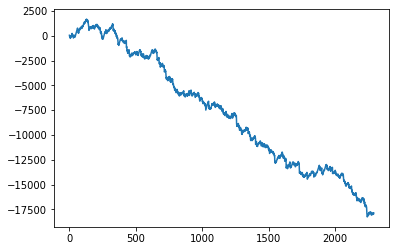

In [49]:
df['favourite payout'].cumsum().plot()

<AxesSubplot:>

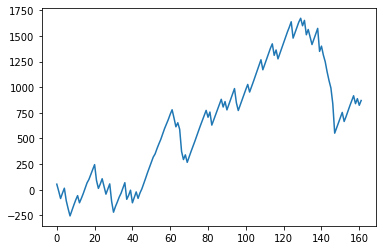

In [50]:
df.query('Year==2020')['favourite payout'].cumsum().plot()